#TODO
1. What to do with NAs
    - 160 out of 3000 is in fraud transactions
    - More description in cell with count of missing values in fraud transactions
2. Variable selection
3. Time series na kolumne 'event timestamp' (?) lub całkowite zaufanie ze model dobrze zlapie
    - na pewno wyciagnac godzine z tej kolumny
4. Bez komplikacji raczej wbudowanych na twardo reguł.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Loading data

In [3]:
path = os.getcwd() + '/data/fraud_challenge_150k.csv'
data = pd.read_csv(path)

# Exploration

In [4]:
data.head()

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,ip_address,user_agent,email_domain,phone_number,billing_city,billing_postal,...,transaction_env,EVENT_TIMESTAMP,applicant_name,billing_address,merchant_id,locale,tranaction_initiate,days_since_last_logon,inital_amount,EVENT_LABEL
0,3371.0,2167.0,56.0,2572.0,154.68.49.124,Opera/9.81.(Windows NT 10.0; ht-HT) Presto/2.9...,perez-garza.com,878-111-5140,Woodsburgh,96336.0,...,X,2020-12-29 09:05:51,Linda Wright,4684 Sharon Ranch,066-82-8795,niu_NZ,O,59.0,13646.0,legit
1,2714.0,2045.0,48.0,4517.0,39.131.125.85,Opera/9.76.(X11; Linux i686; mi-NZ) Presto/2.9...,mcneil-ortega.com,(002)736-0139,West Kevin,78083.0,...,W,2021-06-22 18:05:06,Terri Rivera,7642 Allison Ramp,669-99-9459,apn_IN,J,0.0,11930.0,legit
2,6987.0,2892.0,61.0,5007.0,166.245.194.83,Mozilla/5.0 (X11; Linux x86_64; rv:1.9.6.20) G...,davis-calderon.com,(983)585-2863x652,Lorichester,83236.0,...,X,2021-05-10 13:48:38,Sarah Gray,4948 Lisa Passage,086-41-1624,dv_MV,T,83.0,7412.0,legit
3,2712.0,3040.0,28.0,6022.0,100.1.217.216,Mozilla/5.0 (Macintosh; Intel Mac OS X 10 9_3 ...,rose-lee.org,+1-678-897-3420x60738,Stephenmouth,78364.0,...,N,2021-03-11 07:36:40,Valerie Jenkins,1616 Little Camp,669-97-4021,byn_ER,M,24.0,4623.0,legit
4,3598.0,2976.0,66.0,2600.0,113.156.65.245,Mozilla/5.0 (X11; Linux x86_64; rv:1.9.5.20) G...,nash.net,(013)204-1766x92641,New Brianmouth,77499.0,...,G,2021-03-27 06:13:35,Amy Coleman,149 Harris Rapid,088-21-6329,the_NP,K,21.0,1905.0,legit


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   account_age_days       149892 non-null  float64
 1   transaction_amt        149870 non-null  float64
 2   transaction_adj_amt    149886 non-null  float64
 3   historic_velocity      149885 non-null  float64
 4   ip_address             149873 non-null  object 
 5   user_agent             149887 non-null  object 
 6   email_domain           149910 non-null  object 
 7   phone_number           149873 non-null  object 
 8   billing_city           149884 non-null  object 
 9   billing_postal         149876 non-null  float64
 10  billing_state          149887 non-null  object 
 11  card_bin               149872 non-null  float64
 12  currency               149892 non-null  object 
 13  cvv                    149877 non-null  object 
 14  signature_image        149895 non-nu

In [13]:
data.columns

Index(['account_age_days', 'transaction_amt', 'transaction_adj_amt',
       'historic_velocity', 'ip_address', 'user_agent', 'email_domain',
       'phone_number', 'billing_city', 'billing_postal', 'billing_state',
       'card_bin', 'currency', 'cvv', 'signature_image', 'transaction_type',
       'transaction_env', 'EVENT_TIMESTAMP', 'applicant_name',
       'billing_address', 'merchant_id', 'locale', 'tranaction_initiate',
       'days_since_last_logon', 'inital_amount', 'EVENT_LABEL'],
      dtype='object')

Examination of each column

In [31]:
data['merchant_id'].value_counts()

merchant_id
353-07-5210    2
041-79-6765    2
019-07-8261    2
536-40-1783    2
186-34-1525    2
              ..
804-11-5257    1
472-10-1587    1
254-23-4703    1
657-88-1513    1
319-72-0066    1
Name: count, Length: 149883, dtype: int64

In [60]:
df = data.drop(columns=['applicant_name', 'phone_number', 'applicant_name', 'billing_address', 'merchant_id', 'cvv'])

In [36]:
df['EVENT_LABEL'].value_counts()

EVENT_LABEL
legit    141836
fraud      8164
Name: count, dtype: int64

In [37]:
df['EVENT_LABEL'] = [0 if x == 'legit' else 1 for x in df['EVENT_LABEL']]

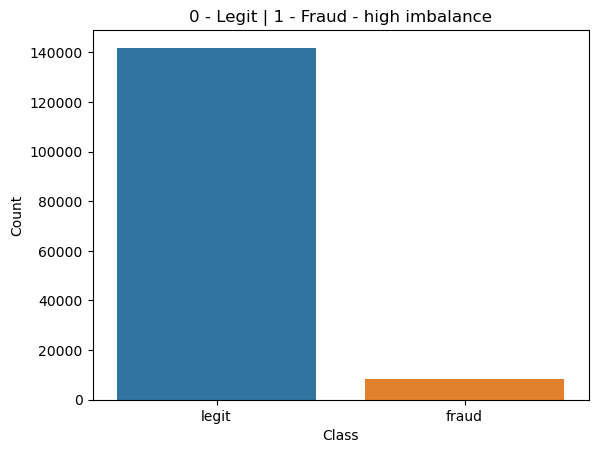

In [38]:
sns.countplot(data, x='EVENT_LABEL')
plt.title('0 - Legit | 1 - Fraud - high imbalance')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [40]:
all_rows = df['EVENT_LABEL'].count()
fraud_rows = df['EVENT_LABEL'].sum()
legit_rows = all_rows - fraud_rows
print(f'There is {round((fraud_rows/all_rows)*100, 2)}% of fraud transactions, which is {fraud_rows} transactions.')
print(f'There is {round((legit_rows/all_rows)*100, 2)}% of legit transactions, which is {legit_rows} transactions.')

There is 5.44% of fraud transactions, which is 8164 transactions.
There is 94.56% of legit transactions, which is 141836 transactions.


In [41]:
# Rows with legit transactions and missing data can be deleted. Those who has fraud should be looked at more, after variable selection.
# Those with irrelevant columns can be supplemented with some default value, and those with important data missing imputed or deleted.
missing_rows = df[df.isna().any(axis=1)]
missing_fraud = missing_rows[missing_rows['EVENT_LABEL'] == 1]
missing_fraud.isna().sum()

account_age_days          6
transaction_amt           8
transaction_adj_amt      10
historic_velocity         3
ip_address                5
user_agent                7
email_domain              2
billing_city              5
billing_postal            8
billing_state             7
card_bin                  8
currency                  7
cvv                      11
signature_image           7
transaction_type          5
transaction_env           2
EVENT_TIMESTAMP           6
locale                    6
tranaction_initiate       4
days_since_last_logon     9
inital_amount            10
EVENT_LABEL               0
dtype: int64

In [43]:
df.describe()

,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,billing_postal,card_bin,days_since_last_logon,inital_amount,EVENT_LABEL
count,149892.000000,149870.000000,149886.000000,149885.000000,149876.000000,149872.000000,149864.000000,149872.000000,150000.000000
mean,4645.751995,2521.458944,54.202434,4702.200033,50190.088160,41837.521512,49.866392,7998.025275,0.054427
std,1153.816155,604.524161,10.070401,1188.476704,28378.078852,10080.587192,29.204766,4047.071560,0.226858
min,1.000000,5.000000,1.000000,50.000000,503.000000,6040.000000,0.000000,1000.000000,0.000000
25%,3824.000000,2103.000000,48.000000,3872.000000,25314.000000,35386.000000,24.000000,4487.000000,0.000000
50%,4667.000000,2544.000000,55.000000,4730.000000,50117.000000,42086.000000,50.000000,8002.000000,0.000000
75%,5476.000000,2951.000000,61.000000,5548.000000,74338.000000,47374.000000,75.000000,11494.000000,0.000000
max,9119.000000,4999.000000,99.000000,9999.000000,99950.000000,67639.000000,100.000000,15000.000000,1.000000


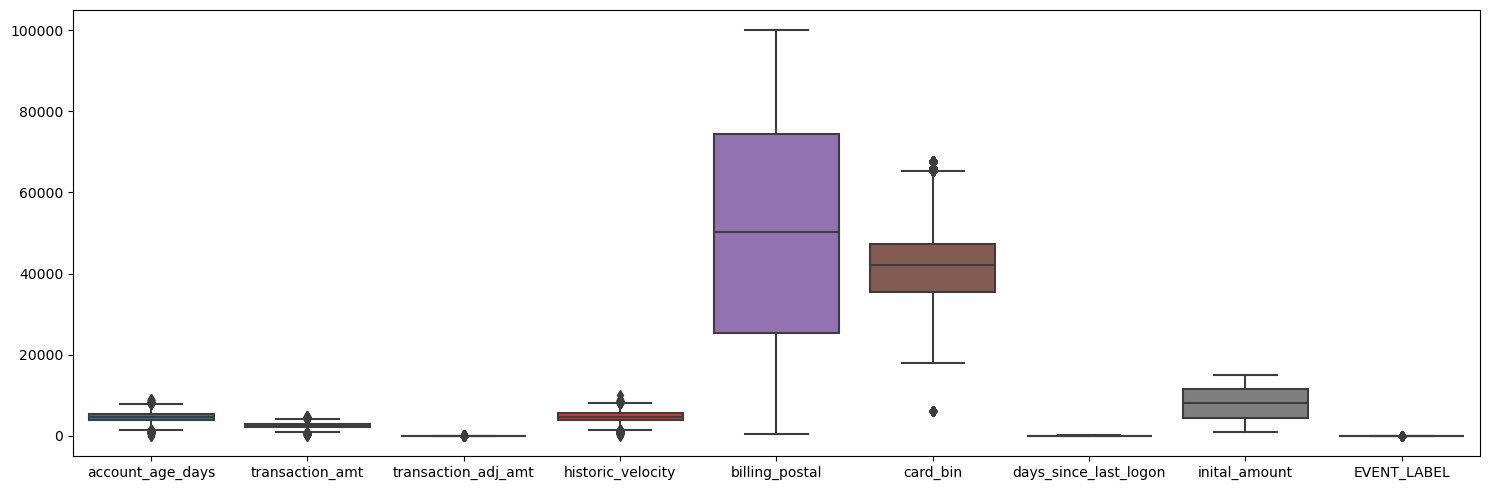

In [47]:
plt.figure().set_size_inches(15,5)
sns.boxplot(df)
plt.tight_layout() 
plt.show()

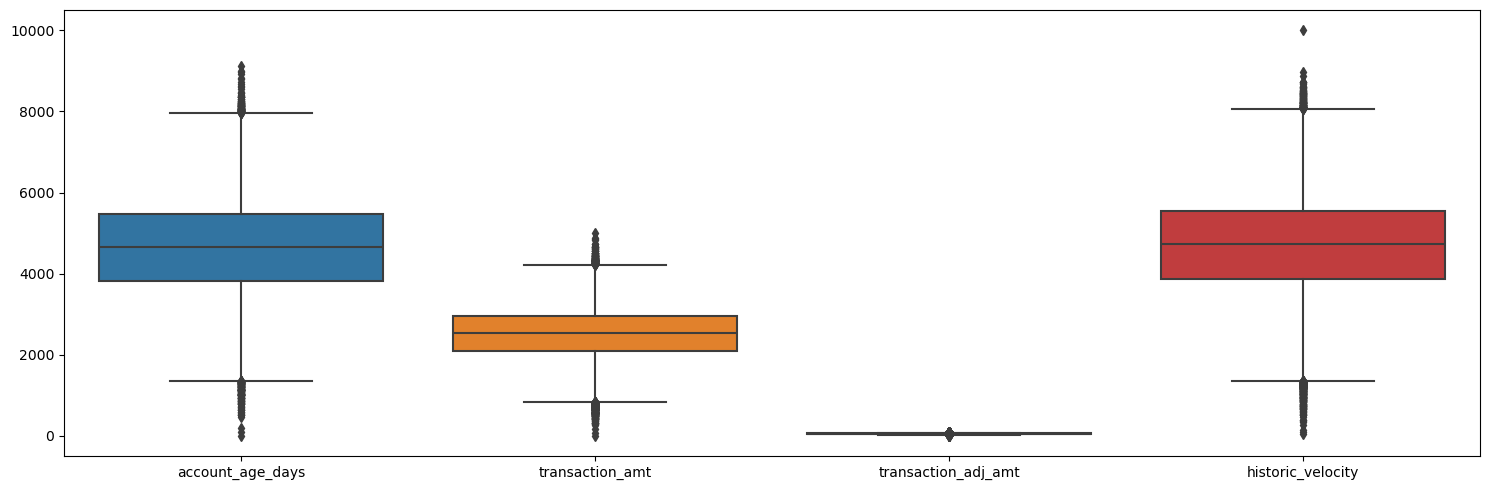

In [53]:
df_pom = df[['account_age_days', 'transaction_amt', 'transaction_adj_amt', 'historic_velocity']]
plt.figure().set_size_inches(15,5)
sns.boxplot(data = df_pom)
plt.tight_layout() 
plt.show()

In [58]:
df['historic_velocity'].sort_values(ascending=False)

19948     9999.0
123899    8975.0
54531     8875.0
1979      8736.0
91495     8735.0
           ...  
139613       NaN
140716       NaN
146280       NaN
149446       NaN
149906       NaN
Name: historic_velocity, Length: 150000, dtype: float64

## Cleaning

In [63]:
df['ip_address'].value_counts()

ip_address
112.34.150.175     37
221.107.175.65     36
142.172.163.136    35
178.59.123.228     35
171.68.166.15      35
                   ..
154.156.177.24      1
54.166.116.204      1
212.86.239.0        1
202.79.83.25        1
68.177.136.155      1
Name: count, Length: 13668, dtype: int64